#### Importation des librairies 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

#### Téléchargement du jeu de données

In [2]:
data = pd.read_csv("wine_train.csv")
X_test = pd.read_csv("wine_test.csv")

#On sépare les covariables et variable à prédire 
X = data[data.columns[0:-1]]
y = data[["target"]]

#Division du jeu de données
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X,y, test_size=0.33, random_state=42)

On définit les fonctions dont on fera usage ultérieurement: 

In [3]:
def partie_entiere(vector):
    nv = vector.copy()
    for i in range(len(vector)): 
        nv[i] = np.int64(vector[i])
    return nv

def partie_decimale(vector): 
    nvector = vector.copy()
    for i in range(len(nvector)): 
        dec = vector[i] % 1
        if dec >= 0.5: 
            nvector[i] = np.int64(vector[i]) + 1
        else: nvector[i] = np.int64(vector[i])
    return nvector

def train_eval(model, metric, X, y, X_test, y_test):
    lab = str(model()) 
    #Entrainement du modèle 
    mod = model()
    mod.fit(X,y)
    pred = mod.predict(X_test)

    plt.figure()
    plt.hist(y_te, density=True, label="True", alpha=0.5, bins=np.linspace(3,9,7))
    plt.hist(pred, density=True, label=lab, alpha=0.5, bins=np.linspace(3,9,7))
    plt.title("Histogramme des predicitions de "+lab)
    plt.legend()
    plt.show()

    print("normal: ", metric(y_test, pred))

    pe = partie_entiere(pred);pde = partie_decimale(pred)

    print("entiere: ", metric(y_test,pe))
    print("dec: ", metric(y_test, pde))
    return pred

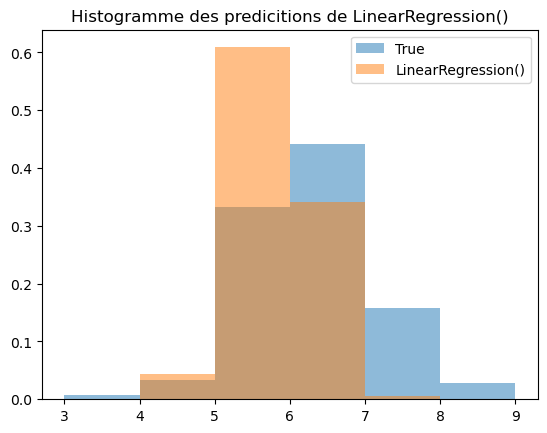

normal:  0.30361983429070905
entiere:  -0.10221546384886881
dec:  0.18451839190179153


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


p = train_eval(LinearRegression, r2_score, X_tr, y_tr, X_te, y_te)

On constate que le modèle à du mal à prédire des classes situées aux extrêmités. Ceci pourrait être du à la répartition inégale des effectifs de chaque classe. On va ainsi essayer de créer des effectifs artificiels pour gerer ce déséquilibre. 

In [9]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

oversample = SMOTE(random_state=0, sampling_strategy='auto',k_neighbors=min(y_tr.value_counts()))
X_, y_ = oversample.fit_resample(X, y)

Xtr, Xte, ytr, yte = train_test_split(X_,y_, test_size=0.33, random_state=42)

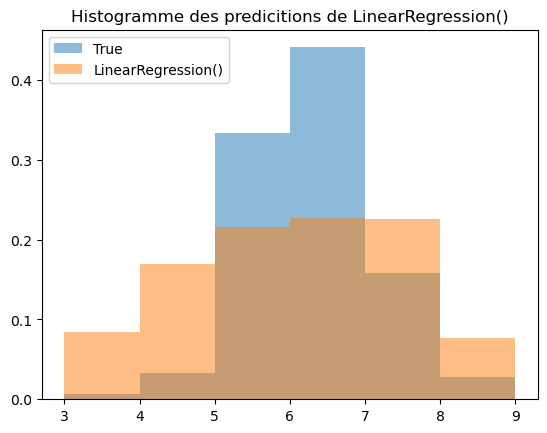

normal:  0.5341969526210923
entiere:  0.45040389103611367
dec:  0.5191578416721465


/opt/conda/envs/DataChallenge/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor

plr = train_eval(LinearRegression, r2_score, Xtr, ytr, Xte, yte)
psvm = train_eval(SVR, r2_score, Xtr, ytr, Xte, yte)